In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

df = pd.read_csv("ClientProfile (Candidate's Copy).csv")
col = df.columns[-3:].tolist()

AmountInStocks
['High', 'Low']
High Low
5050.0


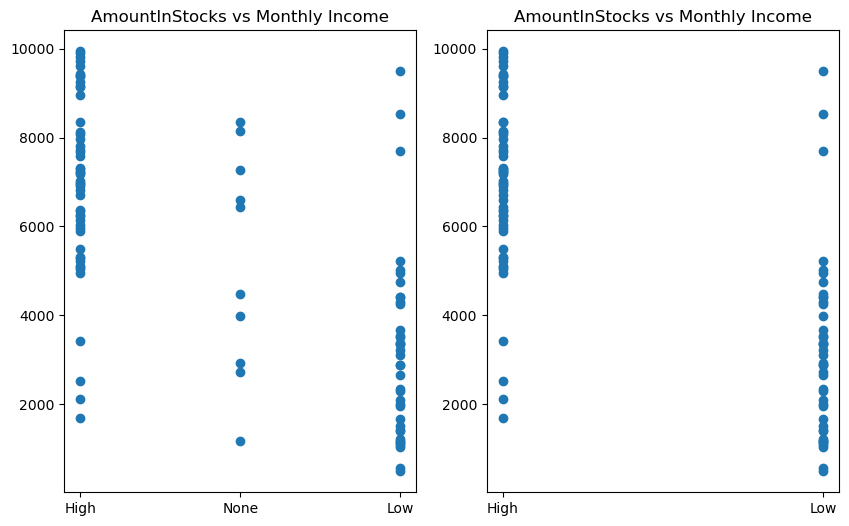

AmountInBonds
['High', 'Low']
Low High
5050.0


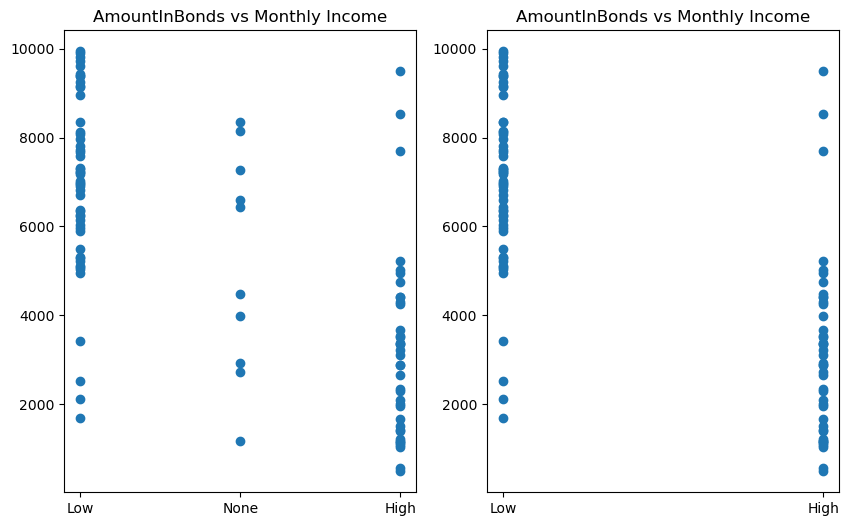

HasRelationshipManager
['No', 'Yes']
Yes No
4462.2


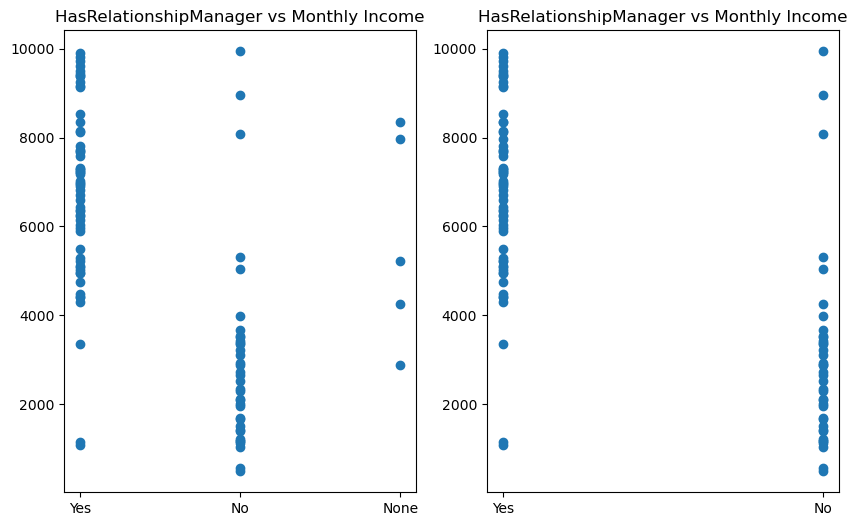

In [166]:
def fill_values1(row):
    if row[i] != 'None':
        return row[i]
    else:
        if row['MonthlyIncome'] > quantile:
            return c1
        else:
            return c2

for i in col:
    df[i] = df[i].fillna('None')
    classes = df[i].unique().tolist()
    classes.remove('None')
    classes.sort()
    print(i)
    print(classes)

    if np.mean(df[df[i]==classes[0]]['MonthlyIncome']) > np.mean(df[df[i]==classes[1]]['MonthlyIncome']):
        c1 = classes[0] # higher class
        c2 = classes[1] # lower class
    else:
        c1 = classes[1]
        c2 = classes[0]
    print(c1, c2)

    quantile = df[df[i]==c1]['MonthlyIncome'].quantile(0.1)
    
    print(quantile)
    plt.figure(figsize= (10,6))
    plt.subplot(121)
    plt.scatter(df[i], df['MonthlyIncome'])
    plt.title(f'{i} vs Monthly Income')

    df[i] = df.apply(fill_values1, axis=1)
    
    plt.subplot(122)
    plt.scatter(df[i], df['MonthlyIncome'])
    plt.title(f'{i} vs Monthly Income')

    plt.show()

    # break


In [167]:
# obtain postal code from address
df['PostalCode'] = df['Address'].apply(lambda s: s.split(' ')[-1]).astype('int64')

# obtain streetname from address
# (?<=\d+\s): start after space following the first set of digits
# (?=\s#): end before space following # character
#  .*: everything in between
df['StreetName'] = df['Address'].apply(lambda s: re.findall('(?<=\d+\s).*(?=\s#)',s)[0])

# label high net worth individuals by monthly income 
df['HighNetWorthIndividual'] = np.where(df['MonthlyIncome'] > 8000, 'Yes', 'No')


In [168]:
df

,FirstName,LastName,Address,MonthlyIncome,AmountInStocks,AmountInBonds,HasRelationshipManager,PostalCode,StreetName,HighNetWorthIndividual
0,David,Langdon,Block 475 Bedok North #84-6612 Singapore 475226,5093,High,Low,Yes,475226,Bedok North,No
1,Bella,Chapman,Block 925 Cactus Dr #76-742 Singapore 925424,6918,High,Low,Yes,925424,Cactus Dr,No
2,Connor,Ogden,Block 617 Temasek Boulevard #13-5833 Singapore...,8346,High,Low,Yes,617455,Temasek Boulevard,Yes
3,Adam,Springer,Block 904 Gul Drive #63-8429 Singapore 904977,8961,High,Low,No,904977,Gul Drive,Yes
4,Kimberly,Wilkins,Block 698 Colombo Court #42-8430 Singapore 698965,7294,High,Low,Yes,698965,Colombo Court,No
...,...,...,...,...,...,...,...,...,...,...
95,Carl,Hudson,Block 490 May Road #64-3411 Singapore 490417,8079,High,Low,No,490417,May Road,Yes
96,Katherine,Burgess,Block 312 Tagore Drive #84-5136 Singapore 312112,7687,High,Low,Yes,312112,Tagore Drive,No
97,Jack,Dowd,Block 764 Cecil Street #97-3752 Singapore 764830,2125,High,Low,No,764830,Cecil Street,No
98,Carolyn,Mackay,Block 382 Middle Road #42-4807 Singapore 382809,9806,High,Low,Yes,382809,Middle Road,Yes


In [178]:
# additional rows to add 
df2 = pd.DataFrame([['Tom', 'Henderson', 'Block 256 Downtown Road #27-2743 Singapore 256376', 3356, 'Low', 'High', 'No', 256376, 'Downtown Road', 'No'], 
                    ['Grace', 'Maple', 'Block 624 Marymount Street #35-9234 Singapore 624298', 7824, 'High', 'Low', 'Yes', 624298, 'Marymount Street', 'No']], columns=df.columns)

# concatenate original and new rows
df0 = pd.concat([df,df2])

# reset index, remove index column 
df0 = df0.reset_index(drop=True)
df0

,FirstName,LastName,Address,MonthlyIncome,AmountInStocks,AmountInBonds,HasRelationshipManager,PostalCode,StreetName,HighNetWorthIndividual
0,David,Langdon,Block 475 Bedok North #84-6612 Singapore 475226,5093,High,Low,Yes,475226,Bedok North,No
1,Bella,Chapman,Block 925 Cactus Dr #76-742 Singapore 925424,6918,High,Low,Yes,925424,Cactus Dr,No
2,Connor,Ogden,Block 617 Temasek Boulevard #13-5833 Singapore...,8346,High,Low,Yes,617455,Temasek Boulevard,Yes
3,Adam,Springer,Block 904 Gul Drive #63-8429 Singapore 904977,8961,High,Low,No,904977,Gul Drive,Yes
4,Kimberly,Wilkins,Block 698 Colombo Court #42-8430 Singapore 698965,7294,High,Low,Yes,698965,Colombo Court,No
...,...,...,...,...,...,...,...,...,...,...
97,Jack,Dowd,Block 764 Cecil Street #97-3752 Singapore 764830,2125,High,Low,No,764830,Cecil Street,No
98,Carolyn,Mackay,Block 382 Middle Road #42-4807 Singapore 382809,9806,High,Low,Yes,382809,Middle Road,Yes
99,Ruth,James,Block 907 Kaki Bukit Place #75-5920 Singapore ...,5492,High,Low,Yes,907419,Kaki Bukit Place,No
100,Tom,Henderson,Block 256 Downtown Road #27-2743 Singapore 256376,3356,Low,High,No,256376,Downtown Road,No
